# 3 Autogen - Stocks examples

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

17/06/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import openai
import os
import sys

from autogen.coding import LocalCommandLineCodeExecutor
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

## 1. Settings

In [3]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

In [4]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    #filter_dict={"tags": ["gpt-4"]},  # comment out to get all
)
# When using a single openai endpoint, you can use the following:
# config_list = [{"model": "gpt-4", "api_key": os.getenv("OPENAI_API_KEY")}]

## 2. Agents

In [5]:
# create an AssistantAgent named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": None,
        "config_list": config_list,
        "temperature": 0,
    },
)

In [6]:
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith(
        "TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir=WORK_DIR),
    },
)

In [7]:
assistant

In [8]:
user_proxy

## 3. Examples

In the above example, the summary method is set to **reflection_with_llm** which takes a list of messages from the conversation and summarize them using a call to an LLM.

https://microsoft.github.io/autogen/docs/tutorial/conversation-patterns/

In [9]:
# the assistant receives a message from the user_proxy, which contains the task description
chat_res = user_proxy.initiate_chat(
    assistant,
    message=
    """What is the current date today? Compare the year-to-date gain for META and TESLA.""",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

What is the current date today? Compare the year-to-date gain for META and TESLA.

--------------------------------------------------------------------------------
assistant (to user_proxy):

First, let's get the current date using Python. 

```python
# python code
from datetime import date

# Get today's date
today = date.today()

print("Today's date:", today)
```

Next, we need to get the year-to-date (YTD) gain for META (Facebook) and TESLA. We can use the `yfinance` library in Python to get the stock prices. 

Please install the library if you haven't done so by running `pip install yfinance` in your terminal.

Here is the Python code to get the YTD gain for META and TESLA.

```python
# python code
import yfinance as yf
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Get the stock data for the year
meta_data = yf.download('META', start='2022-01-01', end=today)
tesla_data = yf.download('TSLA', start='2022

In [10]:
chat_res

ChatResult(chat_id=None, chat_history=[{'content': 'What is the current date today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': 'First, let\'s get the current date using Python. \n\n```python\n# python code\nfrom datetime import date\n\n# Get today\'s date\ntoday = date.today()\n\nprint("Today\'s date:", today)\n```\n\nNext, we need to get the year-to-date (YTD) gain for META (Facebook) and TESLA. We can use the `yfinance` library in Python to get the stock prices. \n\nPlease install the library if you haven\'t done so by running `pip install yfinance` in your terminal.\n\nHere is the Python code to get the YTD gain for META and TESLA.\n\n```python\n# python code\nimport yfinance as yf\nfrom datetime import datetime\n\n# Get today\'s date\ntoday = datetime.today().strftime(\'%Y-%m-%d\')\n\n# Get the stock data for the year\nmeta_data = yf.download(\'META\', start=\'2022-01-01\', end=today)\ntesla_data = yf.download(\'TSLA\', start=\'2022-01-01\

In [11]:
print("\033[1;31;34m")
print("Chat history:", chat_res.chat_history)


Chat history: [{'content': 'What is the current date today? Compare the year-to-date gain for META and TESLA.', 'role': 'assistant'}, {'content': 'First, let\'s get the current date using Python. \n\n```python\n# python code\nfrom datetime import date\n\n# Get today\'s date\ntoday = date.today()\n\nprint("Today\'s date:", today)\n```\n\nNext, we need to get the year-to-date (YTD) gain for META (Facebook) and TESLA. We can use the `yfinance` library in Python to get the stock prices. \n\nPlease install the library if you haven\'t done so by running `pip install yfinance` in your terminal.\n\nHere is the Python code to get the YTD gain for META and TESLA.\n\n```python\n# python code\nimport yfinance as yf\nfrom datetime import datetime\n\n# Get today\'s date\ntoday = datetime.today().strftime(\'%Y-%m-%d\')\n\n# Get the stock data for the year\nmeta_data = yf.download(\'META\', start=\'2022-01-01\', end=today)\ntesla_data = yf.download(\'TSLA\', start=\'2022-01-01\', end=today)\n\n# Calc

In [12]:
print("\033[1;31;34m")
print("Summary:", chat_res.summary)


Summary: As of June 19, 2024, the year-to-date (YTD) gain for META (Facebook) is approximately 47.54%, indicating an increase in stock value since the start of the year. Conversely, TESLA has a YTD gain of approximately -53.78%, indicating a decrease in stock value since the start of the year.


In [13]:
chat_res.cost

{'usage_including_cached_inference': {'total_cost': 0.09426,
  'gpt-4': {'cost': 0.09426,
   'prompt_tokens': 2046,
   'completion_tokens': 548,
   'total_tokens': 2594}},
 'usage_excluding_cached_inference': {'total_cost': 0.09426,
  'gpt-4': {'cost': 0.09426,
   'prompt_tokens': 2046,
   'completion_tokens': 548,
   'total_tokens': 2594}}}

### Another example

In [14]:
# followup of the previous question
user_proxy.send(
    recipient=assistant,
    message=
    """Plot a chart of their stock price change YTD.
    Save the data to meta_tesla.csv and save the plot to meta_tesla.png.""",
)

user_proxy (to assistant):

Plot a chart of their stock price change YTD.
    Save the data to meta_tesla.csv and save the plot to meta_tesla.png.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, we can use the `matplotlib` library in Python to plot the stock price changes for META and TESLA. We will also use the `pandas` library to save the data to a CSV file.

Please install these libraries if you haven't done so by running `pip install matplotlib pandas` in your terminal.

Here is the Python code to plot the stock price changes and save the data and plot.

```python
# python code
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Get the stock data for the year
meta_data = yf.download('META', start='2022-01-01', end=today)
tesla_data = yf.download('TSLA', start='2022-01-01', end=today)

# Save the

In [15]:
with open(os.path.join(WORK_DIR, 'meta_tesla.csv'), 'r') as f:
    print(f.read())

Date,META,TESLA
2022-01-03,338.5400085449219,399.9266662597656
2022-01-04,336.5299987792969,383.1966552734375
2022-01-05,324.1700134277344,362.7066650390625
2022-01-06,332.4599914550781,354.8999938964844
2022-01-07,331.7900085449219,342.32000732421875
2022-01-10,328.07000732421875,352.7066650390625
2022-01-11,334.3699951171875,354.79998779296875
2022-01-12,333.260009765625,368.739990234375
2022-01-13,326.4800109863281,343.85333251953125
2022-01-14,331.8999938964844,349.8699951171875
2022-01-18,318.1499938964844,343.5033264160156
2022-01-19,319.5899963378906,331.8833312988281
2022-01-20,316.55999755859375,332.0899963378906
2022-01-21,303.1700134277344,314.6333312988281
2022-01-24,308.7099914550781,310.0
2022-01-25,300.1499938964844,306.1333312988281
2022-01-26,294.6300048828125,312.4700012207031
2022-01-27,294.6400146484375,276.3666687011719
2022-01-28,301.7099914550781,282.1166687011719
2022-01-31,313.260009765625,312.239990234375
2022-02-01,319.0,310.4166564941406
2022-02-02,323.0,301

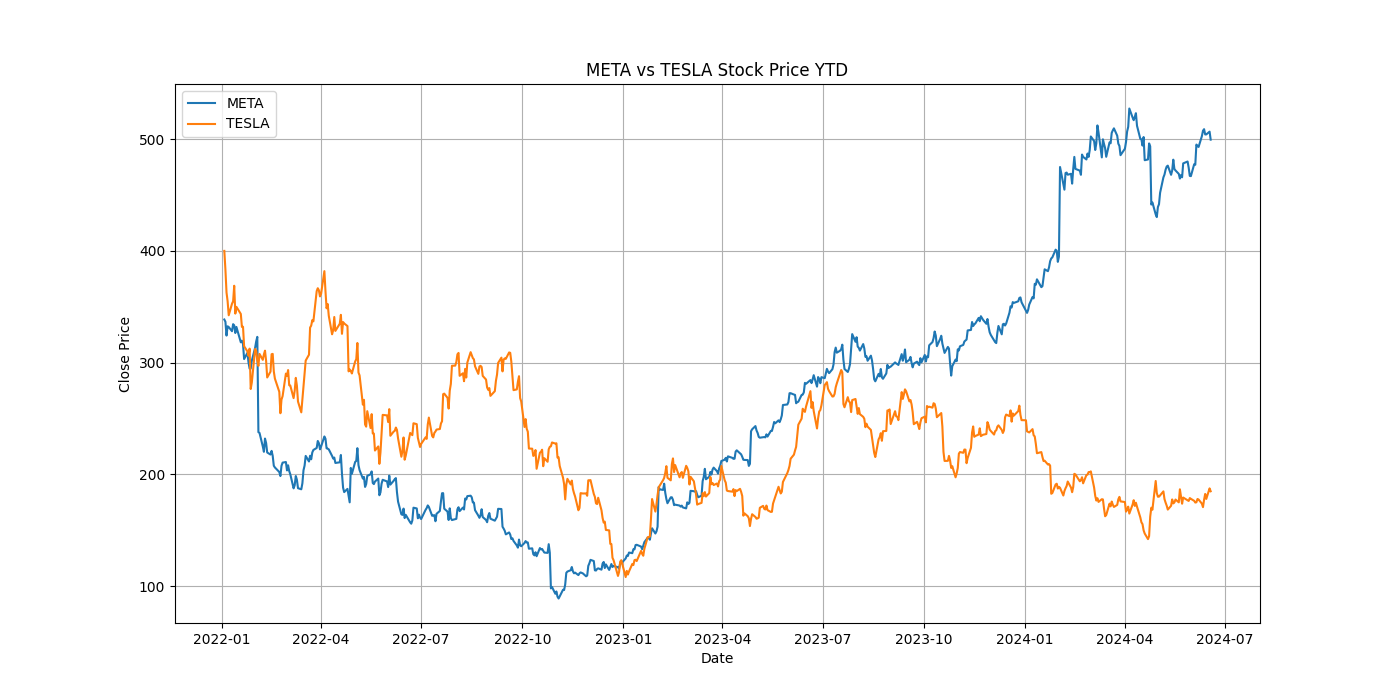

In [16]:
img = Image.open(os.path.join(WORK_DIR, 'meta_tesla.png'))
img

In [17]:
!ls $WORK_DIR/meta_tesla.* -lh

-rwxrwxrwx 1 root root 29K Jun 19 08:11 workdir/meta_tesla.csv
-rwxrwxrwx 1 root root 90K Jun 19 08:11 workdir/meta_tesla.png


In [18]:
user_proxy.send(
    recipient=assistant,
    message=
    """Generate a financial analysis based on the stocks prices and save the results into meta_tesla.txt""",
)

user_proxy (to assistant):

Generate a financial analysis based on the stocks prices and save the results into meta_tesla.txt

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, we can generate a simple financial analysis based on the stock prices. We will calculate the following:

1. Opening price at the start of the year
2. Closing price at the end of the year
3. Highest price during the year
4. Lowest price during the year
5. Year-to-date (YTD) gain

Here is the Python code to generate the financial analysis and save the results to a text file.

```python
# python code
import yfinance as yf
from datetime import datetime

# Get today's date
today = datetime.today().strftime('%Y-%m-%d')

# Get the stock data for the year
meta_data = yf.download('META', start='2022-01-01', end=today)
tesla_data = yf.download('TSLA', start='2022-01-01', end=today)

# Calculate the financial analysis
meta_analysis = {
    'Opening Price': me

In [19]:
!ls $WORK_DIR/meta_tesla.txt -lh

-rwxrwxrwx 1 root root 372 Jun 19 08:12 workdir/meta_tesla.txt


In [20]:
with open(os.path.join(WORK_DIR, 'meta_tesla.txt'), 'r') as f:
    print(f.read())

META Financial Analysis:
Opening Price: 338.29998779296875
Closing Price: 499.489990234375
Highest Price: 531.489990234375
Lowest Price: 88.08999633789062
YTD Gain: 47.54238129231222

TESLA Financial Analysis:
Opening Price: 382.5833435058594
Closing Price: 184.86000061035156
Highest Price: 402.6666564941406
Lowest Price: 101.80999755859375
YTD Gain: -53.77652549673223

